## Import the Libraries and Data

In [1]:
# System
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,accuracy_score
from sklearn.neural_network import MLPRegressor

In [2]:
#Import the data
data=pd.read_csv("sleeptime_prediction_dataset.csv")
data.head(5)

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


## EDA: Overview

In [3]:
# Display summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
WorkoutTime,2000.0,1.495915,0.876639,0.01,0.71,1.520,2.2500,3.00
ReadingTime,2000.0,0.992785,0.577303,0.00,0.50,0.990,1.5000,2.00
PhoneTime,2000.0,2.985195,1.151776,1.00,1.99,2.965,3.9600,5.00
WorkHours,2000.0,6.926945,1.723843,4.00,5.44,6.910,8.4225,10.00
CaffeineIntake,2000.0,147.493780,84.651139,0.02,75.98,146.010,218.9025,299.85
RelaxationTime,2000.0,1.010955,0.582619,0.00,0.51,1.010,1.5300,2.00
SleepTime,2000.0,4.884375,2.028892,0.15,3.84,4.600,5.4700,19.81


In [4]:
# Display data types of each column
data.dtypes.T

WorkoutTime       float64
ReadingTime       float64
PhoneTime         float64
WorkHours         float64
CaffeineIntake    float64
RelaxationTime    float64
SleepTime         float64
dtype: object

In [5]:
# Display the shape of the data
data.shape

(2000, 7)

## Data Preprocessing

In [6]:
# Preview NULL values
data.isnull().sum()

WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64

## EDA: Visualization

In [7]:
# Remove outliers while preserving feature names
# Assuming column index 6 is 'Sleep Duration'
lst = []
for i in range(len(data)):
    if data.iloc[i, 6] >= 10:  # Using iloc instead of array indexing
        lst.append(i)

# Drop the outlier rows while preserving the DataFrame structure
data = data.drop(index=lst)

# Verify the new shape
print(data.shape)
        

(1954, 7)


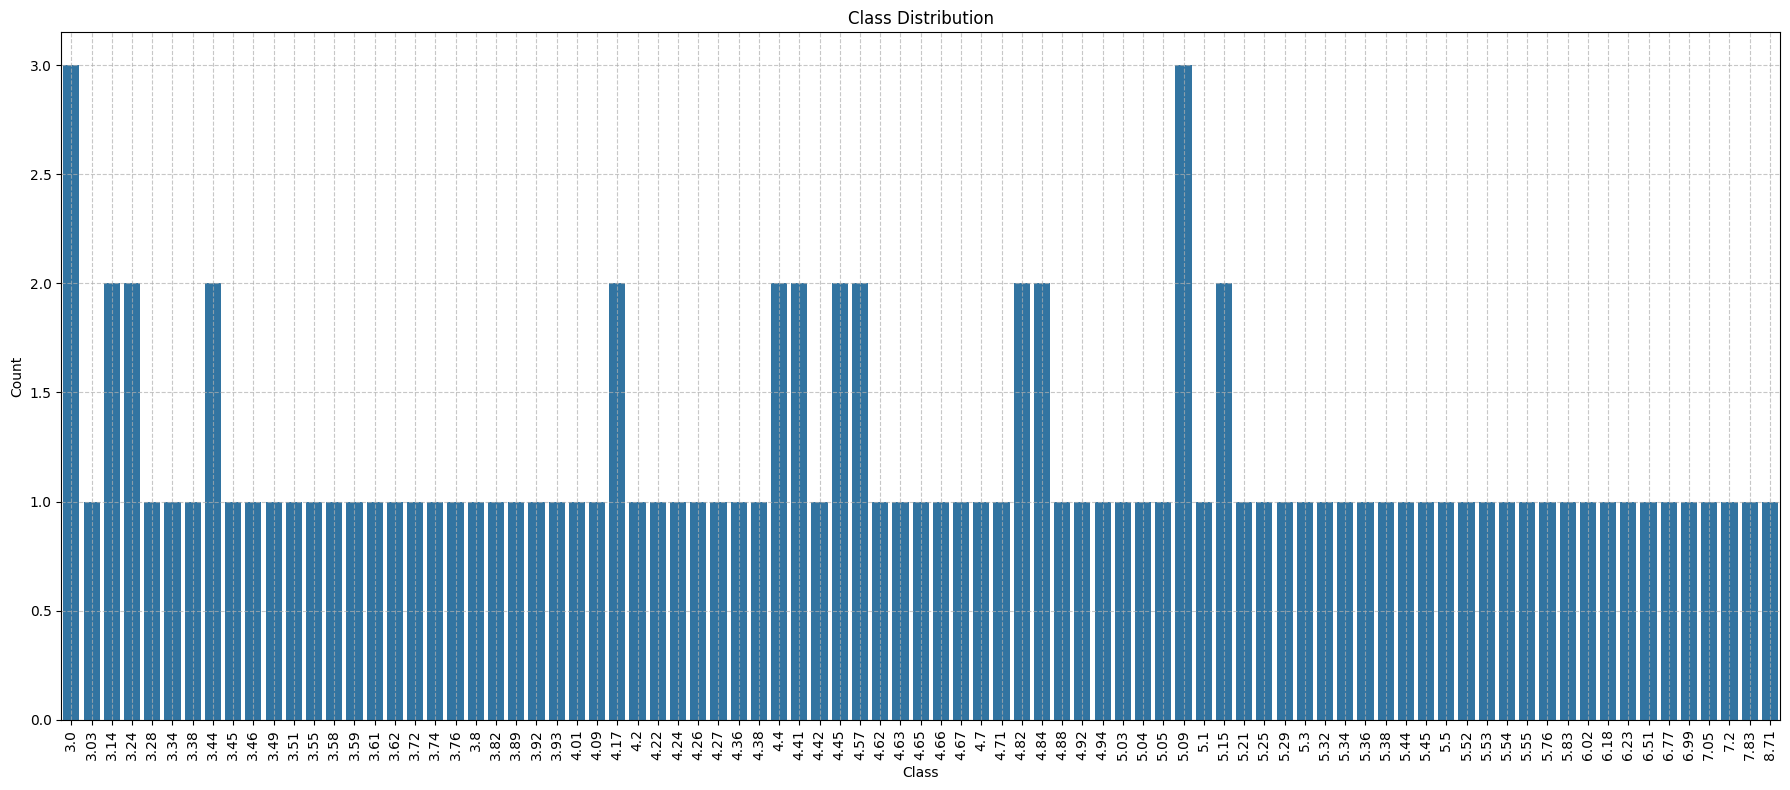

In [8]:
# Filter the data
#Only the first 100 values are taken into account for visualization purpose
class_counts = data['SleepTime'][:100].value_counts()

temp_df = pd.DataFrame({
    "Class": class_counts.index,
    "Count": class_counts.values
})

# Create bar chart
plt.figure(figsize=(18, 8))
sns.barplot(x="Class", y="Count", data=temp_df)


# Set title and labels
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Rotate x-axis labels for better readability if there are many classes
plt.xticks(rotation=90)

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Model Building

In [9]:

# Define variable and target features
X = data.drop(columns=['SleepTime'])
y = data['SleepTime']

nm=MinMaxScaler()
X=pd.DataFrame(nm.fit_transform(X))
X.head(10)

,0,1,2,3,4,5
0,0.371237,0.260,0.5725,0.648333,0.720608,0.375
1,0.949833,0.245,0.8050,0.171667,0.687590,0.335
2,0.732441,0.905,0.7600,0.871667,0.095754,0.175
3,0.598662,0.250,0.1550,0.613333,0.923023,0.605
4,0.153846,0.270,0.1500,0.156667,0.568722,0.475
5,0.153846,0.760,0.2675,0.961667,0.363873,0.865
6,0.053512,0.450,0.3600,0.518333,0.756896,0.030
7,0.866221,0.775,0.4075,0.073333,0.257446,0.645
8,0.598662,0.065,0.6800,0.626667,0.693827,0.765
9,0.705686,0.490,0.0575,0.253333,0.039656,0.760


In [10]:
# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize Multilayer Perceptron model
mlp = MLPRegressor(hidden_layer_sizes=(6,12,12,6),max_iter=500)

# Train Multilayer Perceptron model
mlp.fit(X_train, y_train)

# Make predictions
mlp_preds_test = mlp.predict(X_test)
mlp_preds_train = mlp.predict(X_train)

## Evaluating the Model

In [12]:
# Evaluate with respect to the training data
print("\nTraining Data Evaluation:")
print("MAE (Train)", mean_absolute_error(y_train, mlp_preds_train))
print("MSE (Train)", mean_squared_error(y_train, mlp_preds_train))
print("R^2 (Train)", r2_score(y_train, mlp_preds_train))


Training Data Evaluation:
MAE (Train) 0.10572352395153782
MSE (Train) 0.20978432683807302
R^2 (Train) 0.8359549659489822


In [13]:
# Evaluate with respect to the test data
print("Test Data Evaluation:")
print("MAE (Test)", mean_absolute_error(y_test, mlp_preds_test))
print("MSE (Test)", mean_squared_error(y_test, mlp_preds_test))
print("R^2 (Test)", r2_score(y_test, mlp_preds_test))

Test Data Evaluation:
MAE (Test) 0.12662937573072822
MSE (Test) 0.32648516804347183
R^2 (Test) 0.7604839520127613


## Visualization of Data

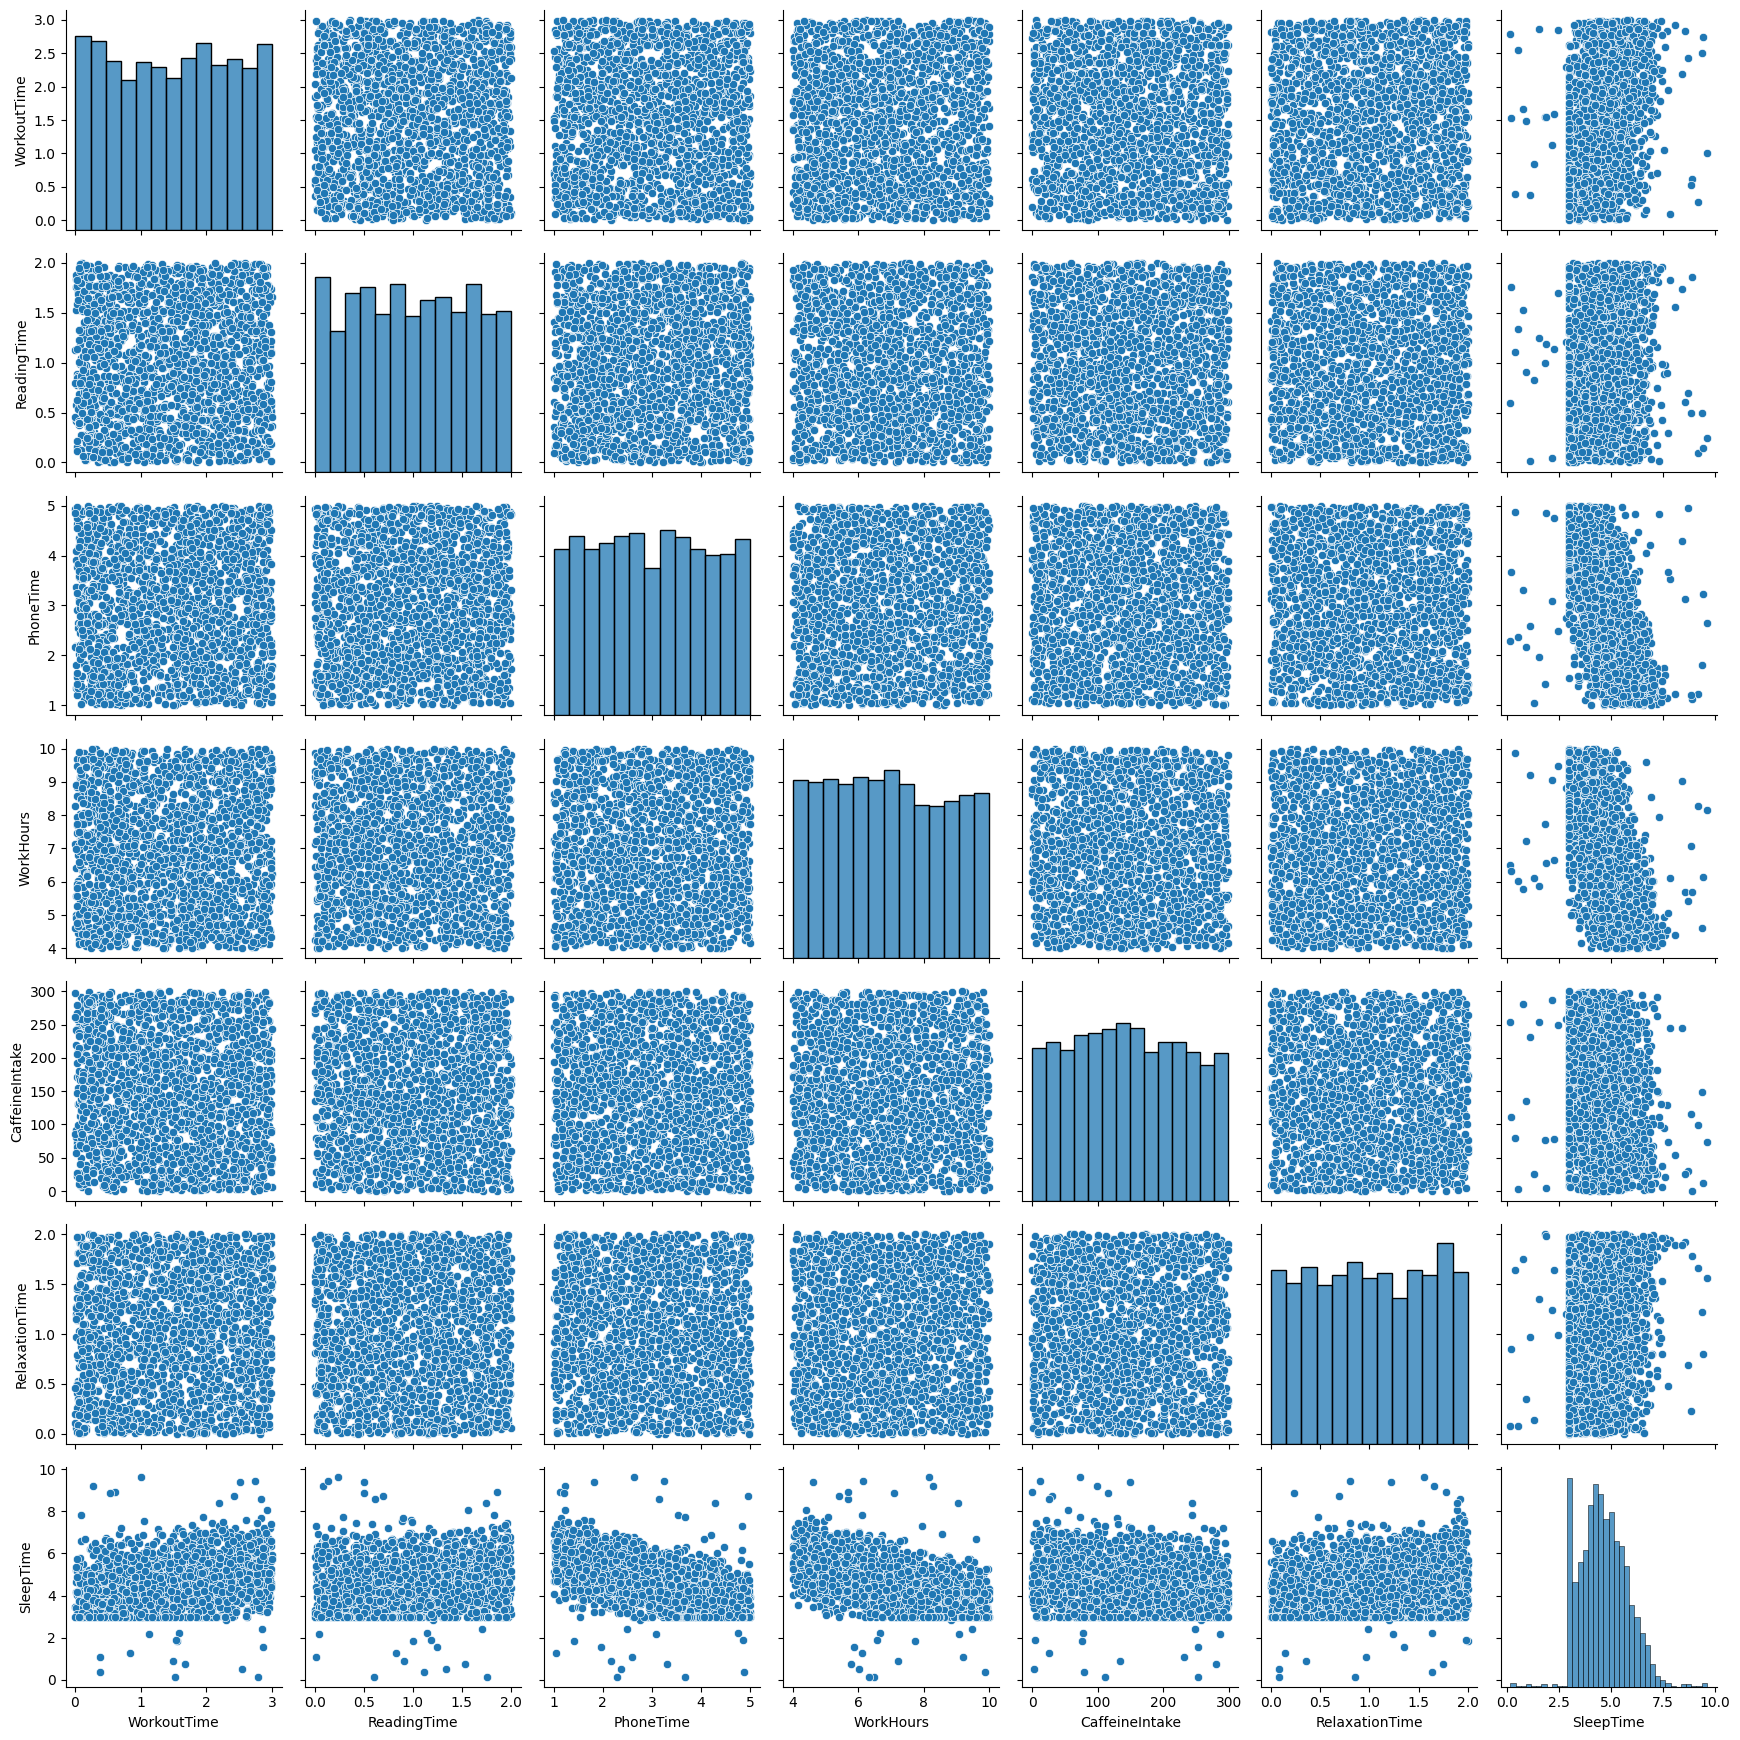

In [14]:
# Pairplot to visualize relationships between features
sns.pairplot(data)
plt.tight_layout()
plt.show()

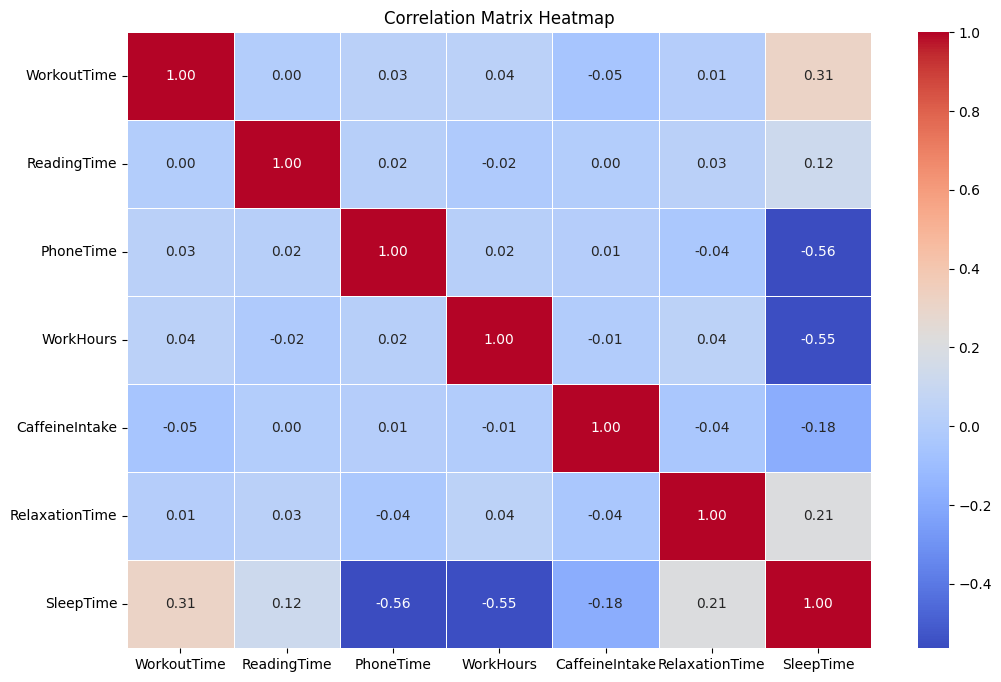

In [15]:
# Correlation matrix heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

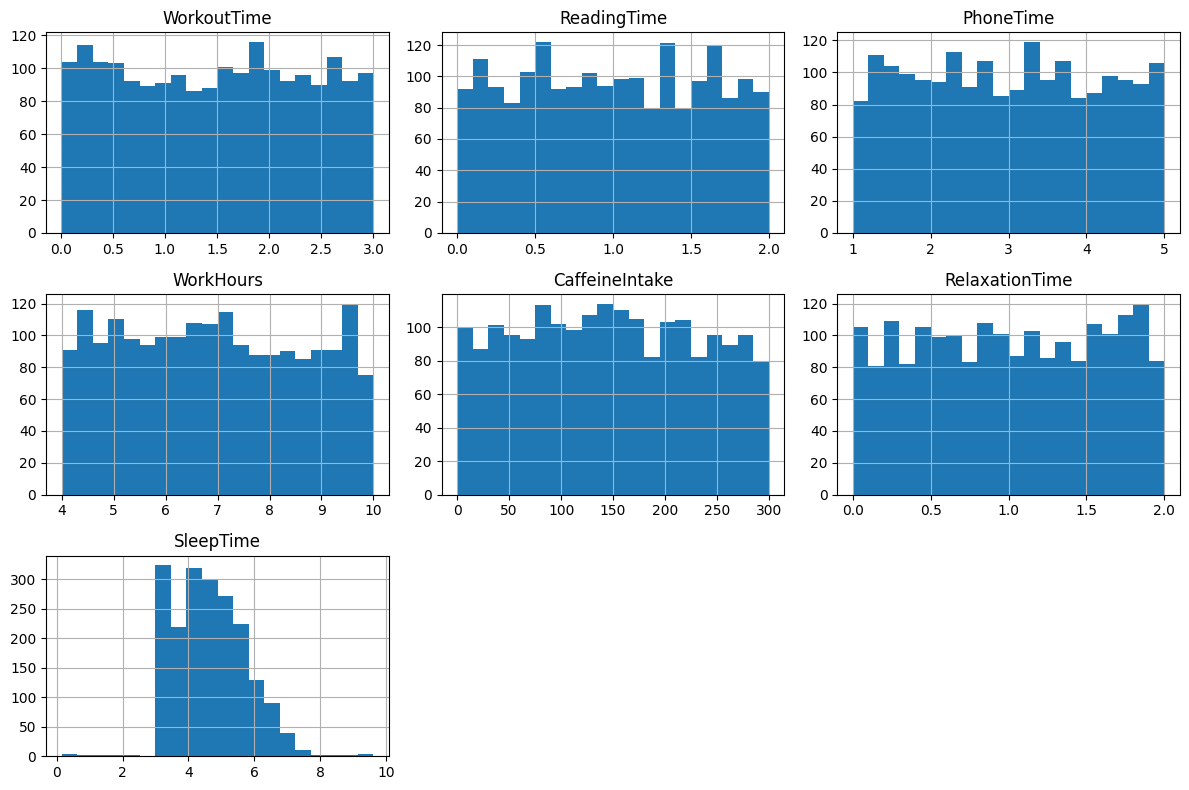

In [16]:
# Plotting histograms for features
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

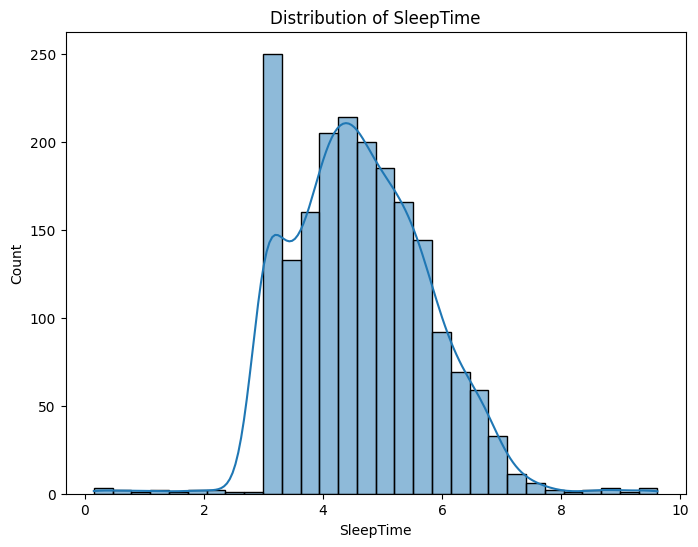

In [17]:
# Distribution plot for the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['SleepTime'], kde=True, bins=30)
plt.title("Distribution of SleepTime")
plt.show()

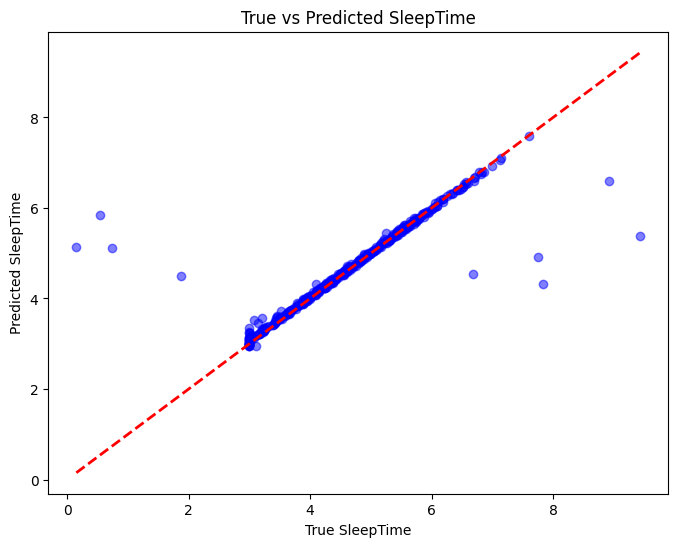

In [18]:
# Scatter plot of True vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, mlp_preds_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("True vs Predicted SleepTime")
plt.xlabel("True SleepTime")
plt.ylabel("Predicted SleepTime")
plt.show()


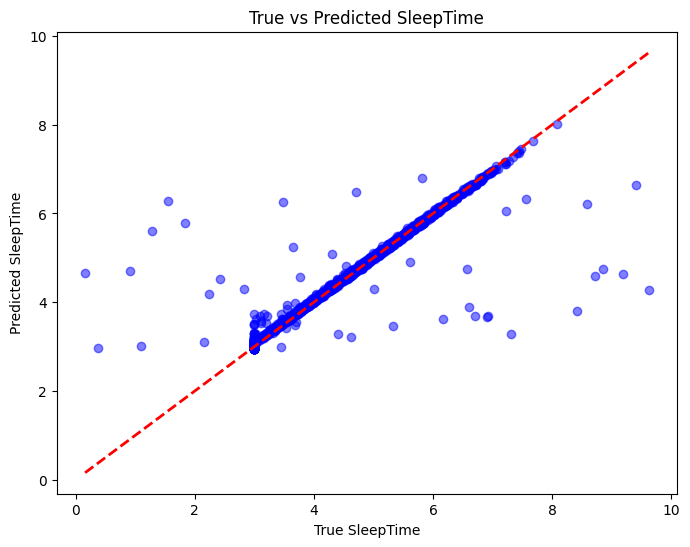

In [19]:
# Scatter plot of True vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, mlp_preds_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title("True vs Predicted SleepTime")
plt.xlabel("True SleepTime")
plt.ylabel("Predicted SleepTime")
plt.show()